#### **Integração Numérica - Método dos trapézios**

In [1]:
import numpy as np 
import pandas as pd
import sympy as sp 
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 51)
pd.set_option('display.float_format', None)

Resolvendo a integral

$$
\int_{1}^{2} \log{x} \, dx
$$


entrada

In [2]:
a, b = 1 ,2 
n_trapezios = 8
n_casas_decimais = 8

dom = np.linspace(a, b, n_trapezios+1)
img = np.log10(dom)

soma das áreas dos trapézios

In [3]:
h = (b - a) / (n_trapezios)
soma = img[0] + 2 * np.sum(img[1:-1]) + img[-1]
area = soma * (h/2)

print(f'Área aproximada: {area:.{n_casas_decimais}f}')

Área aproximada: 0.16748302


tabela

In [4]:
tabela = pd.DataFrame({'x': dom, 'f(x)': img})
tabela = tabela.round({'f(x)': n_casas_decimais})

pd.set_option('display.float_format', '{:.8f}'.format)

tabela


,x,f(x)
0,1.00000000,0.00000000
1,1.12500000,0.05115252
2,1.25000000,0.09691001
3,1.37500000,0.13830270
4,1.50000000,0.17609126
5,1.62500000,0.21085337
6,1.75000000,0.24303805
7,1.87500000,0.27300127
8,2.00000000,0.30103000


erro de arredondamento

In [5]:
decimal = 5 / (10 ** (n_casas_decimais + 1) )
erro_arr = n_trapezios * decimal * h

form = '.2e' if erro_arr < 0.00001 else f'.{n_casas_decimais}f'
intervalo1 =  f'({area:.{n_casas_decimais}f} ± {erro_arr:{form}})'
intervalo2 =  f'[{area - erro_arr:.{n_casas_decimais}f} ; {area+erro_arr:.{n_casas_decimais}f}]'

print(intervalo1, intervalo2, sep='\n\n')

(0.16748302 ± 5.00e-09)

[0.16748302 ; 0.16748303]


gráfico

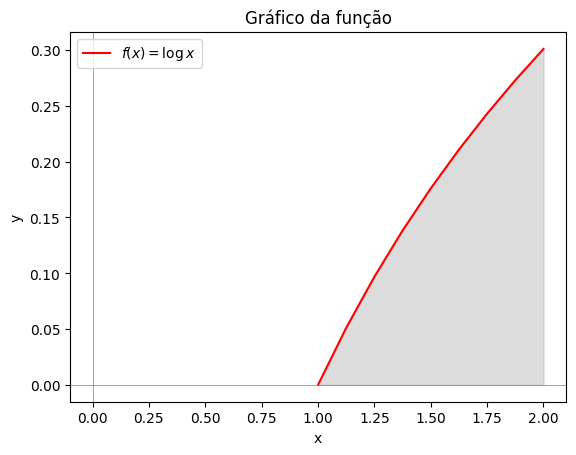

In [6]:
plt.plot(dom, img, label= r'$f(x) = \log{x} $', color='red')

plt.fill_between(dom, img, color='darkgrey', alpha=0.4, ) 
plt.title('Gráfico da função')

plt.xlabel('x'); plt.ylabel('y')
plt.axhline(0, color='gray',linewidth=0.5)  
plt.axvline(0, color='gray',linewidth=0.5) 

plt.legend(loc='upper left')

plt.show()


erro de truncamento

In [7]:
x = sp.Symbol('x')

put = sp.log(x, 10)
out = sp.diff(sp.diff(put))

function = sp.lambdify(x, out)

erro_trunc = n_trapezios * ((h**3) / (12)) * max(abs(function(a)), abs(function(b)))
form = '.2e' if erro_trunc < 0.00001 else f'.{n_casas_decimais}f'

print(f'{erro_trunc:{form}}')


0.00056549


erro total

In [8]:
erro_total = erro_arr + erro_trunc

form = '.2e' if erro_total < 0.00001 else f'.{n_casas_decimais}f'
intervalo1 =  f'({area:.{n_casas_decimais}f} ± {erro_total:{form}})'
intervalo2 =  f'[{area - erro_total:.{n_casas_decimais}f} ; {area+erro_total:.{n_casas_decimais}f}]'

print(intervalo1, intervalo2, sep='\n\n')

(0.16748302 ± 0.00056549)

[0.16691753 ; 0.16804851]
